In [1]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
passengers = pd.read_csv("Results/passengers.csv")

In [3]:
passengers.head()

,Unnamed: 0,arrival,class_id,creation,date,departure,destination,lines,origin,route,transfers,transferstations,waiting_time
0,3e0269f6-7ed2-11e9-9619-7831c1d08f6a,06:30:00,0,06:00:00,2018-01-01,06:07:00,Bullewijk,['metro54'],Centraal Station,"['Centraal Station', 'Nieuwmarkt', 'Waterloopl...",0,[],0
1,3e051908-7ed2-11e9-9210-7831c1d08f6a,06:18:30,0,06:00:00,2018-01-01,06:11:00,Station Zuid,"['metro54', 'metro51']",Waterlooplein,"['Waterlooplein', 'Weesperplein', 'Wibautstraa...",1,['Spaklerweg'],0
2,3e054450-7ed2-11e9-a965-7831c1d08f6a,06:14:30,0,06:00:01,2018-01-01,06:11:00,Station Bijlmer ArenA,['metro54'],Station Holendrecht,"['Station Holendrecht', 'Bullewijk', 'Station ...",0,[],0
3,3e107a5a-7ed2-11e9-ba26-7831c1d08f6a,06:18:30,0,06:00:02,2018-01-01,06:17:30,Station Sloterdijk,"['metro54', 'metro51']",Amstelstation,"['Amstelstation', 'Spaklerweg', 'Overamstel', ...",1,['Spaklerweg'],0
4,3e11af06-7ed2-11e9-ad86-7831c1d08f6a,06:42:00,0,06:00:03,2018-01-01,06:30:00,Amstelstation,['tram12'],De Pijp,"['De Pijp', 'Cornelis Troostplein', 'Scheldest...",0,[],0


In [4]:
dest = pd.DataFrame.from_dict(dict(Counter(passengers['destination'].tolist())), orient='index')
orig = pd.DataFrame.from_dict(dict(Counter(passengers['origin'].tolist())), orient='index')

In [5]:
dest = dest.reset_index()
dest.columns = ['stop','amount']
orig = orig.reset_index()
orig.columns = ['stop','amount']

In [6]:
dest.columns

Index(['stop', 'amount'], dtype='object')

In [7]:
orig['percentage'] = orig['amount'].apply(lambda x: (x/4510)* 100)
dest['percentage'] = dest['amount'].apply(lambda x: (x/4510)* 100)

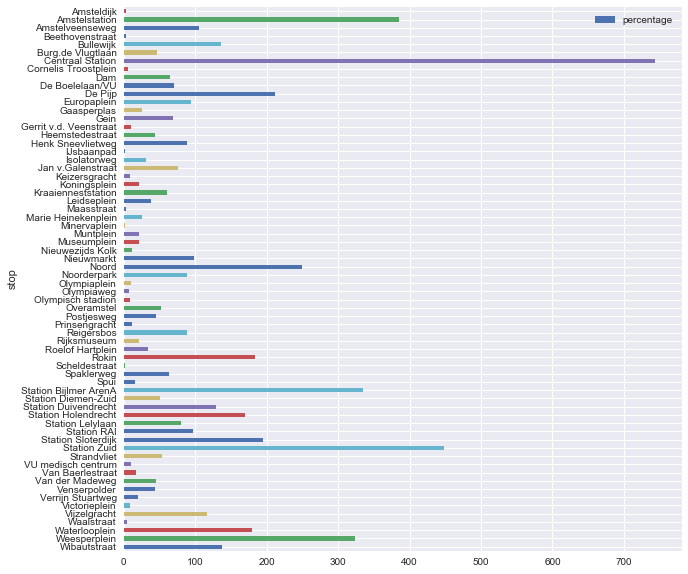

In [8]:
orig = (orig.sort_values(by = 'stop', ascending = False))
orig.plot(kind = 'barh', x = 'stop', y = 'percentage', figsize = [10,10])

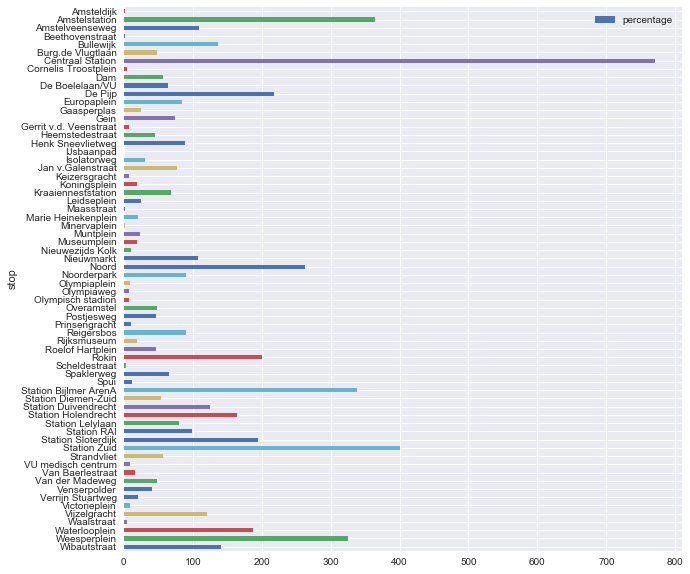

In [9]:
dest = (dest.sort_values(by = 'stop', ascending = False))
dest.plot(kind = 'barh', x = 'stop', y = 'percentage', figsize = [10,10])